# Breath analysis using gas sensitive MOS sensors for lung cancer diagnostics purposes


## Exploratory data analysis

- target variable distribution
- scatter plots for sensor pairs at the same operation temperature level
- scatter plots for pairs of the same sensor at different oparation temperature levels
- correlation matrix between features, features vs target
- feature distribution

## PCA analysis

- explained variance
- exhaled breath samples in PCs space

## Classification

- determination of models, params
- grid search
- cross validation
- results logs
- ROC-AUCs example

## Feature importance





## Exploratory data analysis

In [1]:
#import main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
data = pd.read_csv('medical_study_data.csv', sep=';', engine='python')

# dataset preparation and scaling values from S*s to µS*s for comfortable operation
df = data.drop(['Age', 'Sex', 'Smoking', 'LC_stage', 'LC_type', 'Group', 'Group_name', 'lscm'], axis=1).mul(10**6)
y = data.Group
df.insert(loc=18, column='Group', value=y)

df.head(5)

,S1_T1,S2_T1,S3_T1,S4_T1,S5_T1,S6_T1,S1_T2,S2_T2,S3_T2,S4_T2,S5_T2,S6_T2,S1_T3,S2_T3,S3_T3,S4_T3,S5_T3,S6_T3,Group
0,0.318,0.373,230.437,0.942,0.544,0.701,0.679,0.692,201.542,3.98,1.61,1.500,0.556,0.272,35.300,3.83,0.885,0.766,1
1,0.330,0.277,267.523,1.120,0.895,1.050,0.266,0.189,95.100,2.00,1.01,0.876,0.211,0.175,34.900,4.08,1.160,0.931,1
2,0.545,0.481,526.781,2.400,2.260,2.310,0.736,0.529,265.680,5.45,3.27,2.750,0.698,0.525,118.712,12.50,4.080,3.070,1
3,0.378,0.419,240.888,1.100,0.949,1.010,0.358,0.375,94.700,1.85,1.23,0.948,0.276,0.330,38.400,5.09,1.420,1.070,1
4,0.426,0.478,275.892,1.440,0.863,1.050,0.435,0.468,120.176,3.50,1.13,1.170,0.321,0.370,44.200,6.03,1.400,1.190,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1_T1   118 non-null    float64
 1   S2_T1   118 non-null    float64
 2   S3_T1   118 non-null    float64
 3   S4_T1   118 non-null    float64
 4   S5_T1   118 non-null    float64
 5   S6_T1   118 non-null    float64
 6   S1_T2   118 non-null    float64
 7   S2_T2   118 non-null    float64
 8   S3_T2   118 non-null    float64
 9   S4_T2   118 non-null    float64
 10  S5_T2   118 non-null    float64
 11  S6_T2   118 non-null    float64
 12  S1_T3   118 non-null    float64
 13  S2_T3   118 non-null    float64
 14  S3_T3   118 non-null    float64
 15  S4_T3   118 non-null    float64
 16  S5_T3   118 non-null    float64
 17  S6_T3   118 non-null    float64
 18  Group   118 non-null    int64  
dtypes: float64(18), int64(1)
memory usage: 17.6 KB


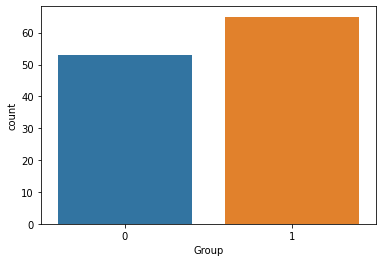

In [4]:
#evaluation of target variable distribution in dataset
import seaborn as sns

sns.countplot(df.Group);

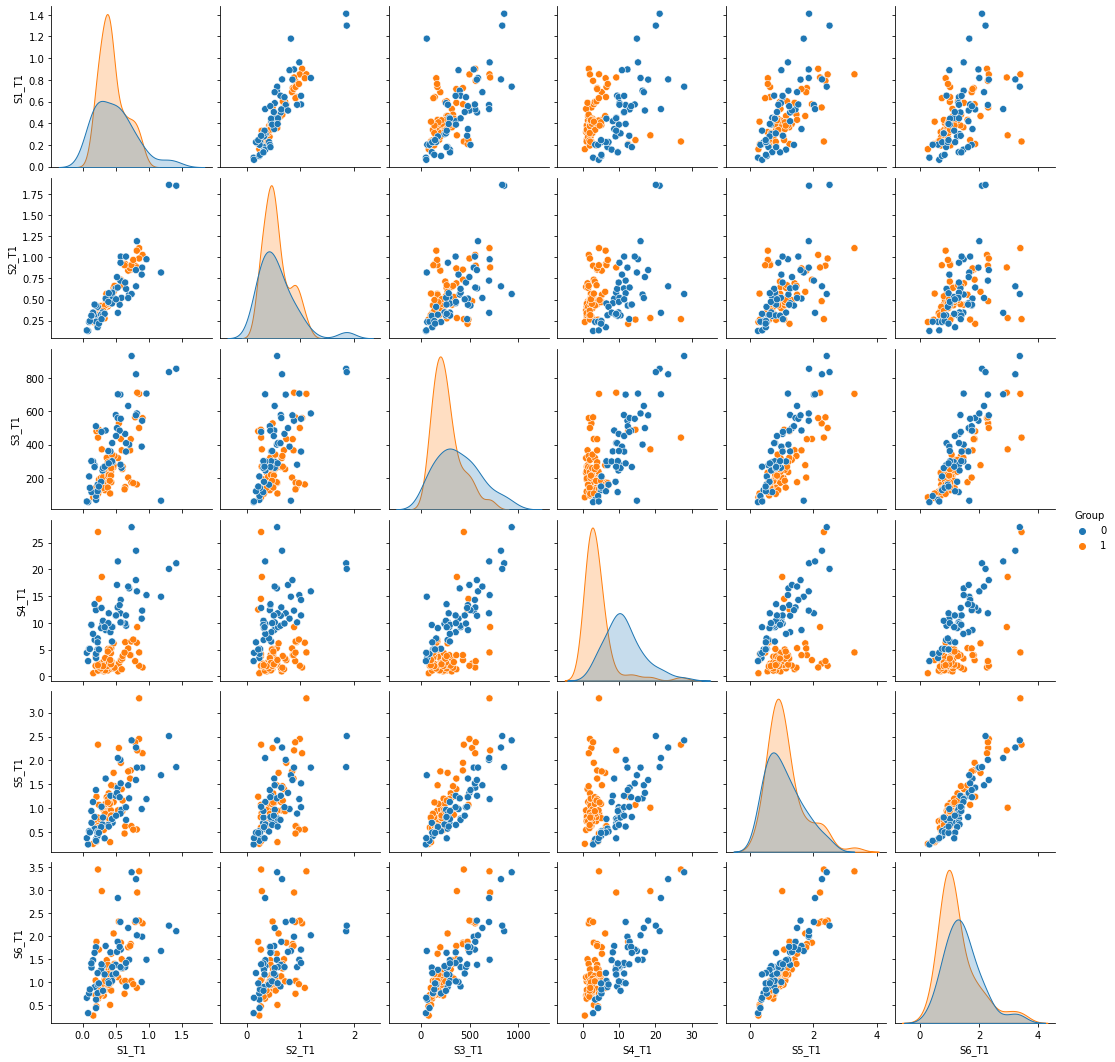

In [5]:
#evaluation of scatter plots for various pair of sensors on the same operation temperature level
sns_plot = sns.pairplot(df, hue='Group', vars=df.columns[0:6],
             plot_kws={'s':50}, diag_kind='kde', diag_kws=dict(shade=True))
#sns_plot.savefig("scatter_T1.png")

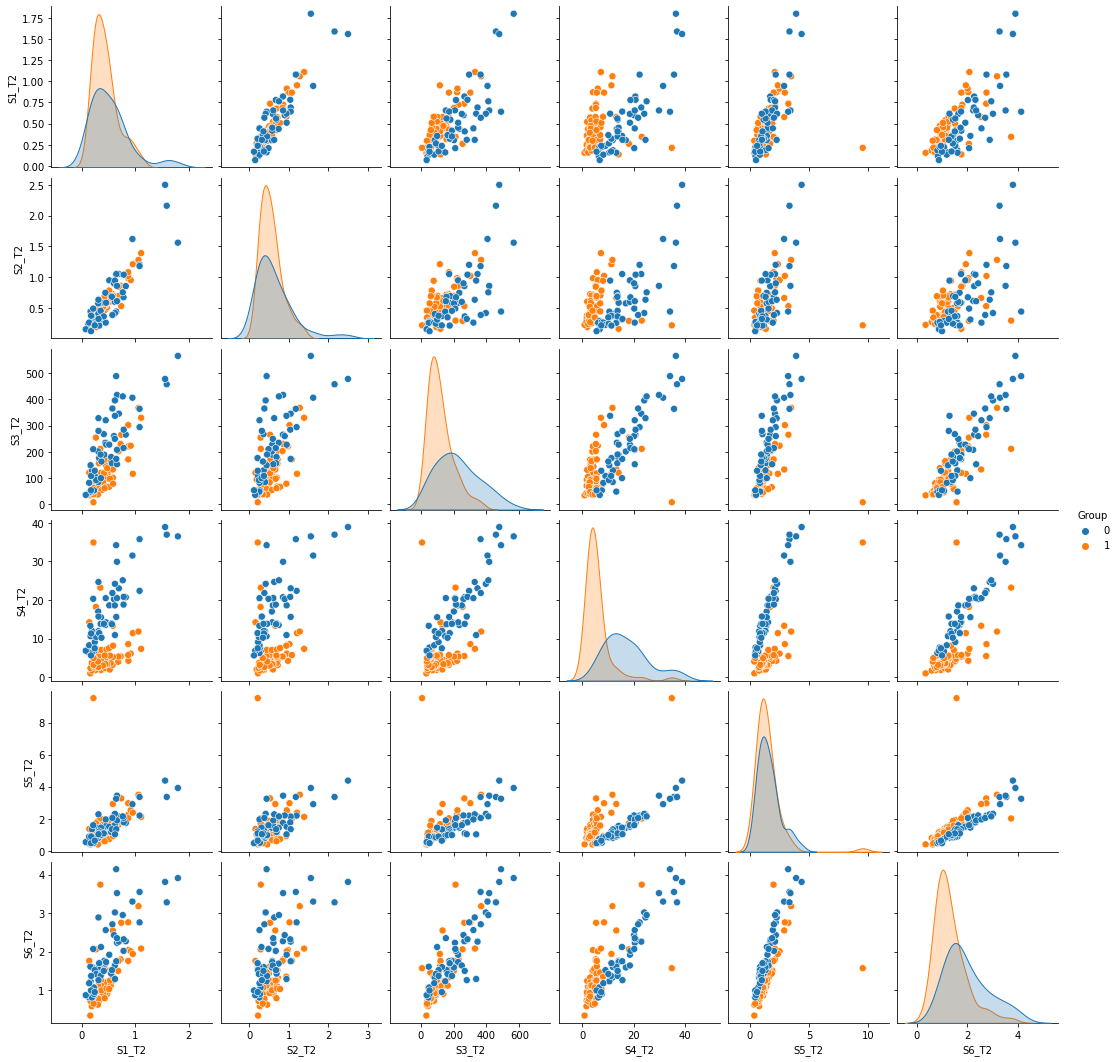

In [6]:
sns_plot = sns.pairplot(df, hue='Group', vars=df.columns[6:12],
             plot_kws={'s':50}, diag_kind='kde', diag_kws=dict(shade=True))
#sns_plot.savefig("scatter_T2.png")

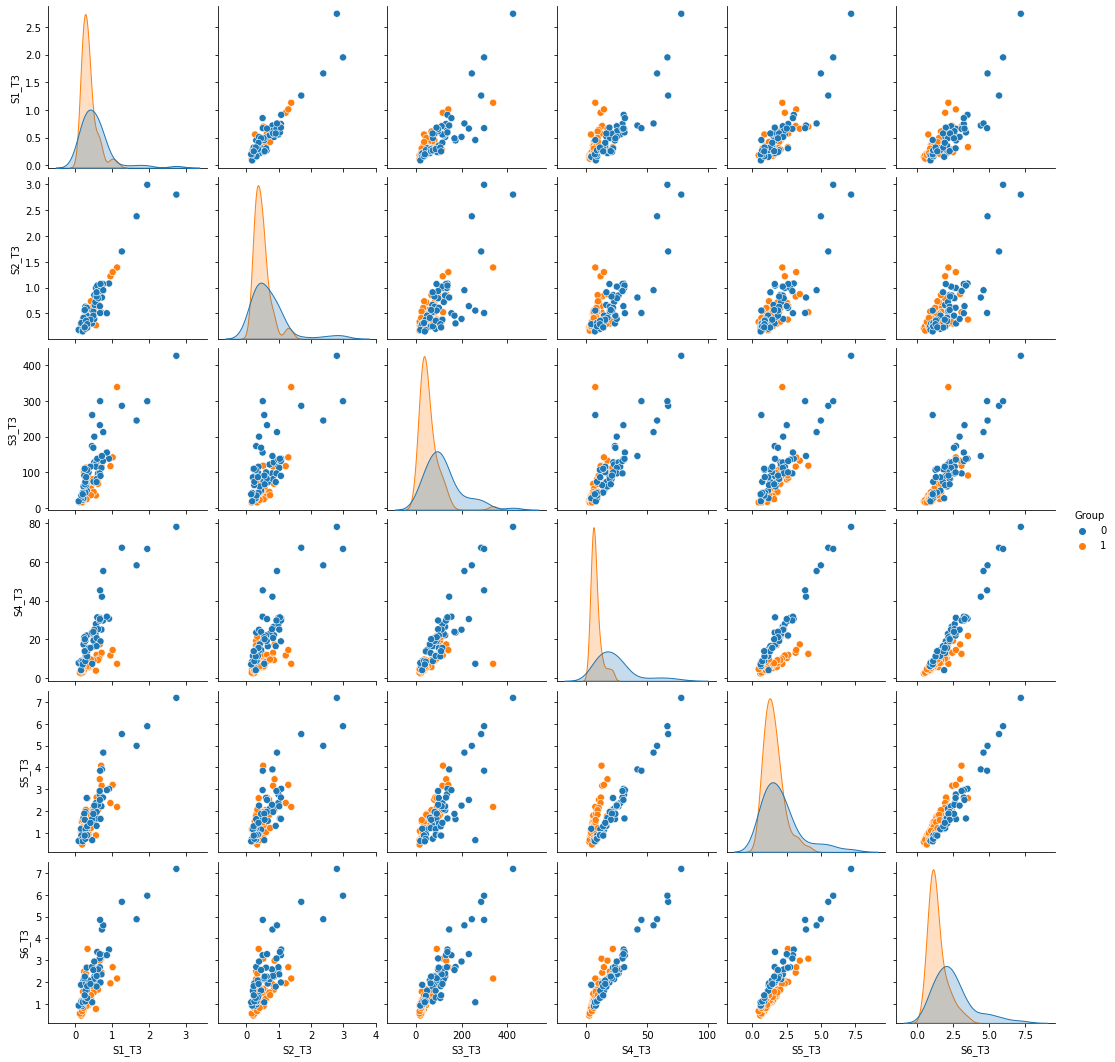

In [7]:
sns_plot = sns.pairplot(df, hue='Group', vars=df.columns[12:18],
             plot_kws={'s':50}, diag_kind='kde', diag_kws=dict(shade=True))
#sns_plot.savefig("scatter_T3.png")

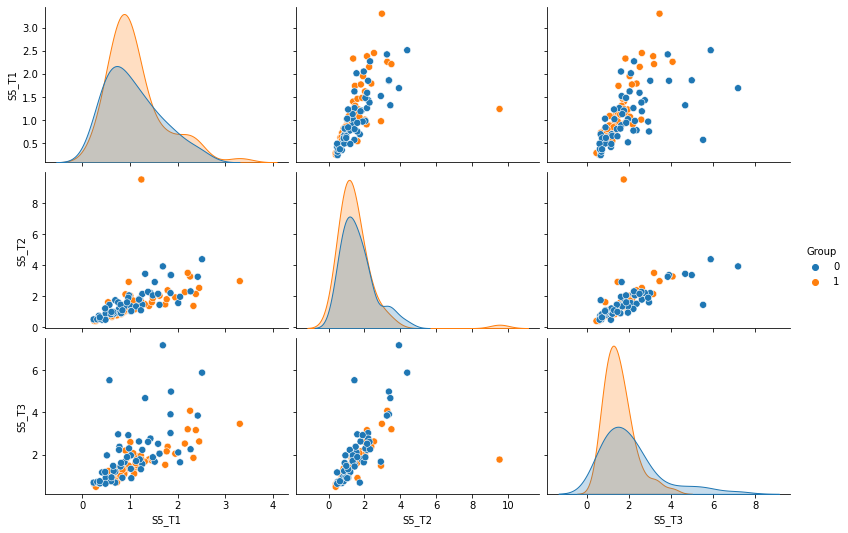

In [8]:
#evaluation of scatter plots for the same sensor at different operation temperatures. E.g. for sensor S5:
sns.pairplot(df, hue='Group', vars=['S5_T1', 'S5_T2', 'S5_T3'], diag_kind='kde',
            plot_kws={'s':50}, diag_kws=dict(shade=True), aspect=1.5);

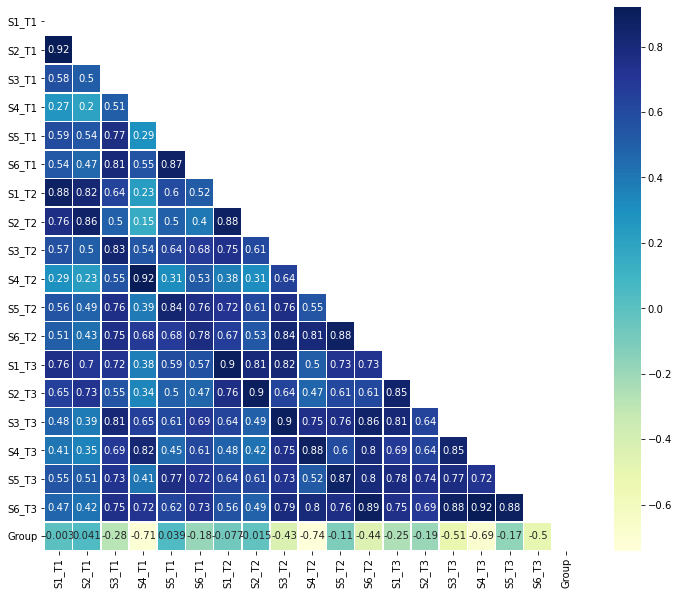

In [9]:
#evaluation of features correlation and correlation with target variable
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(12,10))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns_plot = sns.heatmap(corr_matrix, cmap='YlGnBu', mask=mask, annot=True, linewidths=0.5, square=False);
#plt.savefig("corr_matrix.png")

## Feature distribution

### Raw data

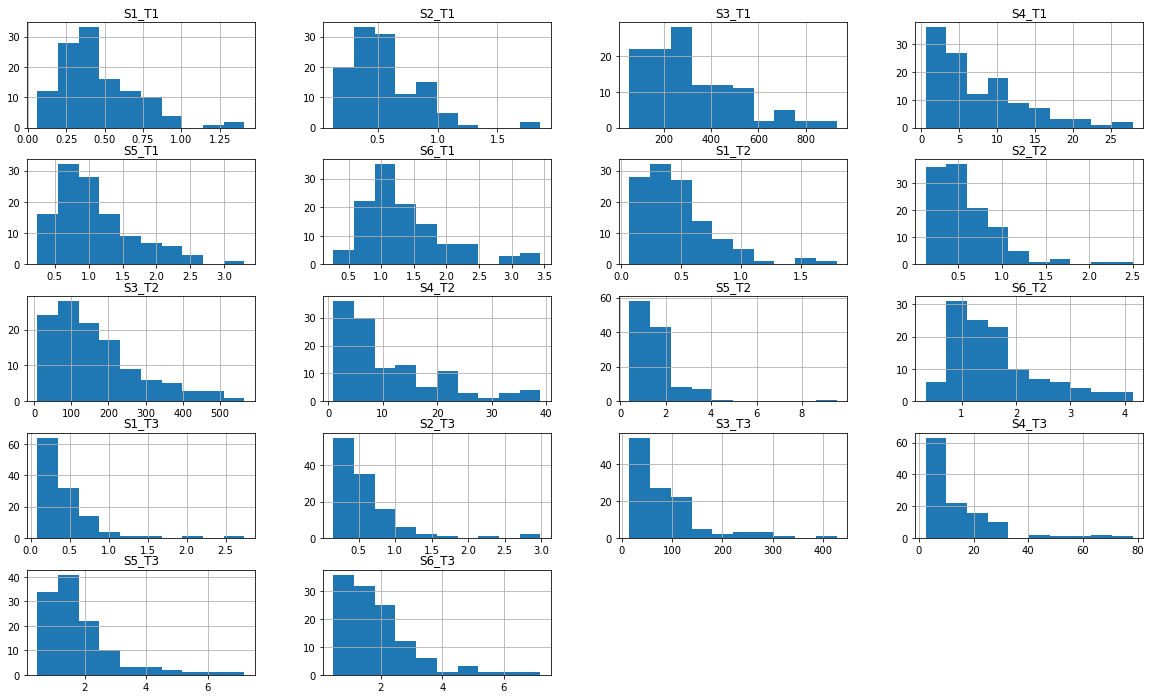

In [10]:
# histogramms on the raw data

df.drop('Group', axis=1).hist(figsize=(20,12));

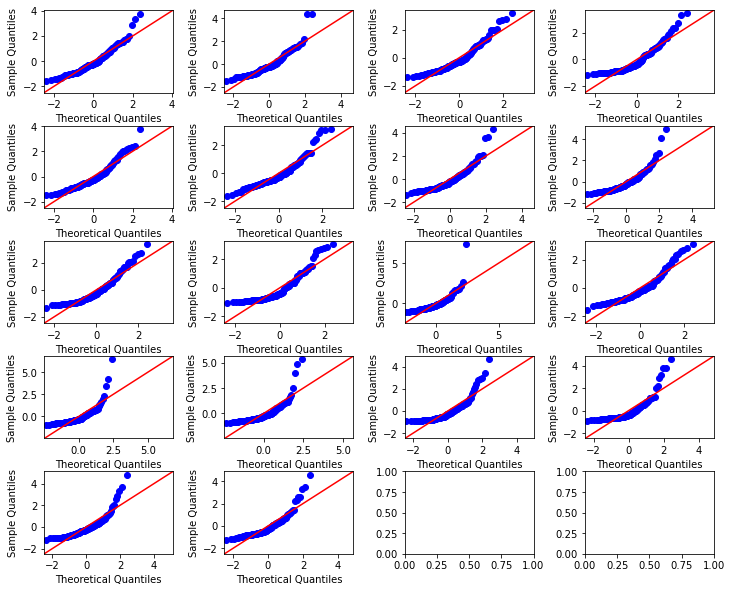

In [11]:
# qqplots on the raw data

fig, axes = plt.subplots(5, 4, figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(18):
    qqplot(df.drop('Group', axis=1).iloc[:,i], line='45', fit=True, ax=axes[i//4,i%4])

In [12]:
# Shapiro test on the raw data

from scipy.stats import shapiro

shapiro_results = list(map(shapiro,[df.drop(['Group'], axis=1).iloc[:,i] for i in range(18)]))
shapiro_results_df = pd.DataFrame(shapiro_results, index=df.drop(['Group'], axis=1).columns, columns=['W-value', 'p-value'])
#shapiro_results_df.to_csv('Shapiro_raw.csv', sep=';')
shapiro_results_df['H0'] = shapiro_results_df['p-value'] > 0.05
shapiro_results_df

,W-value,p-value,H0
S1_T1,0.930252,1.169586e-05,False
S2_T1,0.872062,1.150443e-08,False
S3_T1,0.917342,2.014230e-06,False
S4_T1,0.874979,1.546658e-08,False
S5_T1,0.917042,1.937112e-06,False
S6_T1,0.899611,2.268799e-07,False
S1_T2,0.853080,1.846701e-09,False
S2_T2,0.823213,1.380876e-10,False
S3_T2,0.896643,1.609627e-07,False
S4_T2,0.847141,1.074855e-09,False


### Log transformation

In [13]:
# Shapiro test after log transformation

df_log = np.log(df.drop('Group', axis=1))
df_log.insert(loc=0,column='Group', value=df['Group'])

shapiro_log_results = list(map(shapiro,[df_log.drop(['Group'], axis=1).iloc[:,i] for i in range(18)]))
shapiro_log_results_df = pd.DataFrame(shapiro_log_results, index=df.drop('Group', axis=1).columns, columns=['W-value', 'p-value'])
shapiro_log_results_df['H0'] = shapiro_log_results_df['p-value'] > 0.05
shapiro_log_results_df
#shapiro_log_results_df.to_csv('log_transform.csv', sep=';')

,W-value,p-value,H0
S1_T1,0.981981,0.115031,True
S2_T1,0.989492,0.502807,True
S3_T1,0.985945,0.259765,True
S4_T1,0.978031,0.050106,True
S5_T1,0.989610,0.512886,True
S6_T1,0.983369,0.153684,True
S1_T2,0.994579,0.931693,True
S2_T2,0.993252,0.840959,True
S3_T2,0.976226,0.034335,False
S4_T2,0.976500,0.036353,False


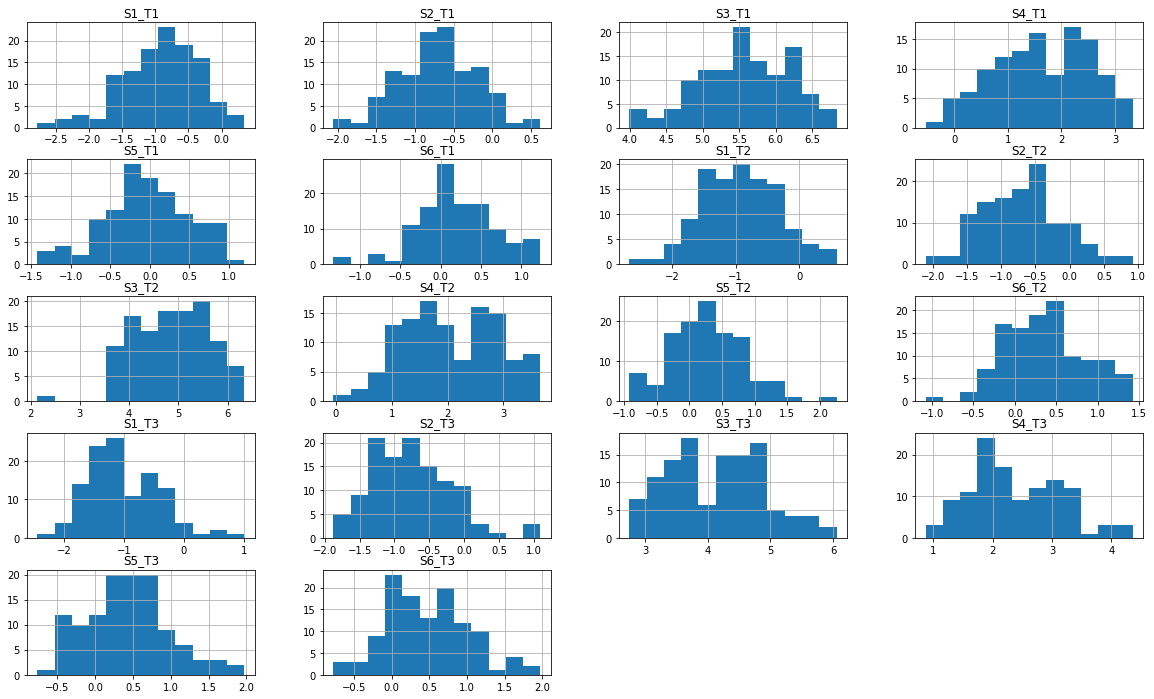

In [14]:
# histogramms after log transformation

df_log.drop(['Group'], axis=1).hist(bins=12, figsize=(20,12));

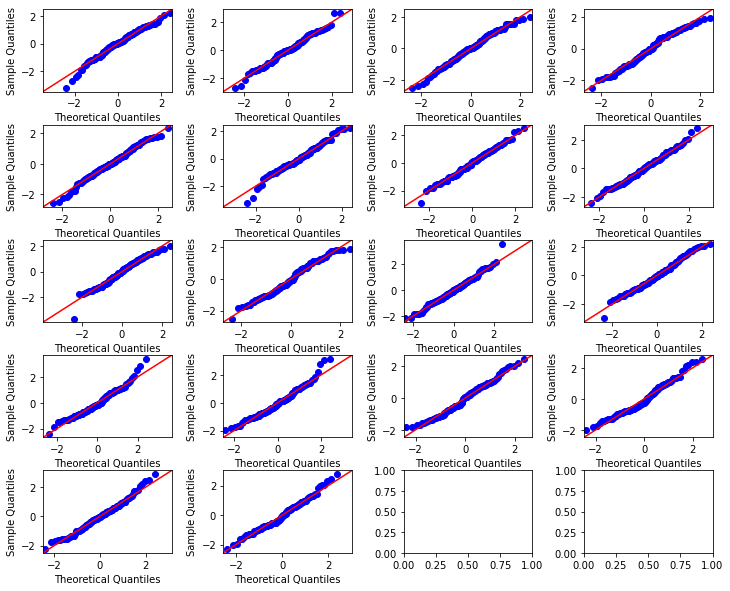

In [15]:
# qqplot after log transformation

fig, axes = plt.subplots(5, 4, figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(18):
    qqplot(df_log.drop('Group', axis=1).iloc[:,i], line='45', fit=True, ax=axes[i//4,i%4])

# PCA

## Explained variance

In [16]:
#scale the data
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(StandardScaler().fit_transform(df.drop('Group', axis=1)))
df_scaled.columns = df.drop('Group', axis=1).columns
df_scaled.insert(loc=0, column='Group', value=df['Group'])

df_scaled.head()

,Group,S1_T1,S2_T1,S3_T1,S4_T1,S5_T1,S6_T1,S1_T2,S2_T2,S3_T2,S4_T2,S5_T2,S6_T2,S1_T3,S2_T3,S3_T3,S4_T3,S5_T3,S6_T3
0,1,-0.572696,-0.621534,-0.463269,-1.076562,-0.946674,-1.004140,0.673601,0.267298,0.292821,-0.772393,0.052417,-0.146727,0.314209,-0.679751,-0.679834,-0.795202,-0.797767,-0.949317
1,1,-0.524960,-0.946786,-0.271343,-1.046574,-0.344361,-0.472022,-0.684419,-1.046048,-0.617128,-0.990722,-0.500742,-0.912957,-0.652271,-0.894460,-0.685293,-0.777147,-0.552945,-0.807405
2,1,0.330314,-0.255625,1.070358,-0.830929,1.997964,1.449092,0.861028,-0.158299,0.841122,-0.610301,1.582826,1.388187,0.712007,-0.119735,0.458635,-0.169024,2.046627,1.032292
3,1,-0.334015,-0.465684,-0.409183,-1.049943,-0.251698,-0.533010,-0.381906,-0.560397,-0.620548,-1.007262,-0.297917,-0.824546,-0.470180,-0.551368,-0.637522,-0.704201,-0.321476,-0.687855
4,1,-0.143070,-0.265789,-0.228032,-0.992663,-0.399273,-0.472022,-0.128716,-0.317572,-0.402759,-0.825322,-0.390110,-0.551945,-0.344118,-0.462828,-0.558360,-0.636310,-0.339281,-0.584646


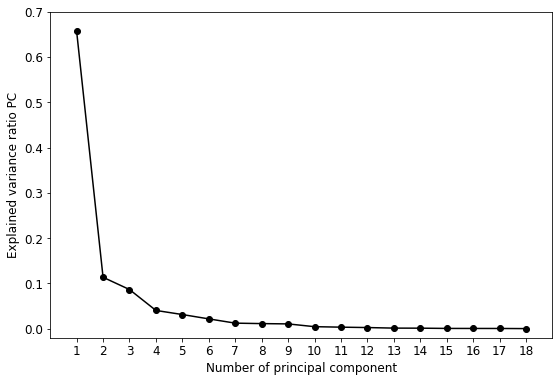

In [17]:
#decomposition using PCA and evaluation of explained variance ratio
from sklearn.decomposition import PCA
random_seed = 4

pca_model = PCA(random_state=random_seed)
df_pca = pca_model.fit_transform(df_scaled.drop('Group', axis=1))


fig = plt.figure(figsize=(9,6))
#plt.title('Scree plot', fontsize=15)
plt.plot(range(1,19), pca_model.explained_variance_ratio_, 'bo-', c='black')

plt.ylim(-0.02,0.7)
plt.xlim(0,19)
plt.xticks(range(1,19,1),fontsize=12)
plt.yticks(fontsize=12)
#plt.ylabel('Доля объяненной дисперсии данных', fontsize=12)
#plt.xlabel('Номер главной компоненты', fontsize=12)
plt.ylabel('Explained variance ratio PC', fontsize=12)
plt.xlabel('Number of principal component', fontsize=12)
#plt.savefig('exp_ratio_pcs.png')
plt.show()

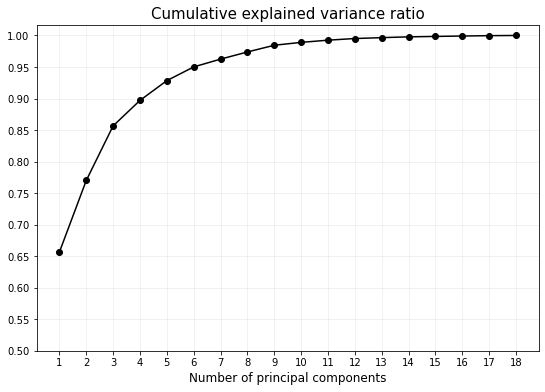

In [18]:
plt.figure(figsize=(9,6))
plt.plot(range(1,19), np.cumsum(pca_model.explained_variance_ratio_), 'bo-', c='black')
#plt.ylabel('Доля объясненной дисперсии', fontsize=12)
#plt.xlabel('Число главных компонент в модели', fontsize=12)
plt.title('Cumulative explained variance ratio', fontsize=15)
#plt.ylabel('Explained variance ratio PC', fontsize=12)
plt.xlabel('Number of principal components', fontsize=12)
#plt.title('Cumulative explained variance ratio', fontsize=15)
plt.xticks(range(1,19))
plt.yticks(np.linspace(0.5,1, 11))
plt.grid(alpha=0.2)
#plt.savefig('Cumul_expl_var_ratio.png')

## Exhaled breath samples in the space of the pairs of three principal components

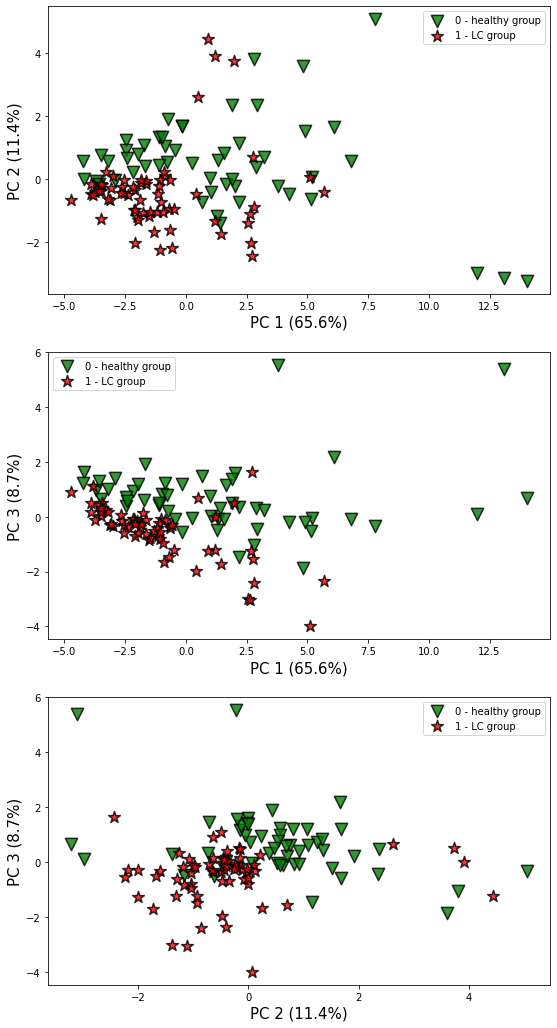

In [19]:
from itertools import combinations

colors = ['green', 'red']
labels = ['healthy group', 'LC group']
markers = ['v','*','o']

fig, axes = plt.subplots(3,1,figsize=(9,18))
for index, pair in enumerate(combinations(set([0,1,2]), 2)):
    plt.subplot(3,1,index+1)
    for y, c in zip(set(df.Group), colors):
        plt.scatter(df_pca[df.Group.values==y, pair[0]], 
                    df_pca[df.Group.values==y, pair[1]], 
                    c=c, alpha=0.8, label=str(y)+' - {}'.format(labels[y]),
                    edgecolors='black', linewidth=1.5, s=150, marker=markers[y])
        plt.legend()
        plt.xlabel('PC {}'.format(pair[0]+1)+' ({}%)'.format(round(pca_model.explained_variance_ratio_[pair[0]]*100, 1)), fontsize=15)
        plt.ylabel('PC {}'.format(pair[1]+1)+' ({}%)'.format(round(pca_model.explained_variance_ratio_[pair[1]]*100, 1)), fontsize=15)
#plt.savefig('3PCs_ENG.png')

# Classification task


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('medical_study_data.csv', sep=';', engine='python')
df = data.drop(['Age', 'Sex', 'Smoking', 'LC_stage', 'LC_type',  'Group', 'Group_name', 'lscm'], axis=1).mul(10**6)
y = data.Group
df.insert(loc=18, column='Group', value=y)

X = df.drop('Group', axis=1)
y = df.Group

random_seed = 45

# models
lg = LogisticRegression(solver='liblinear', random_state=random_seed)
rf = RandomForestClassifier(random_state=random_seed)
knn = KNeighborsClassifier()
svc = SVC(random_state=random_seed, probability=True)

# grid parameters
p_rf = {'n_estimators':range(10,50,5), 'max_depth':range(1,13,2)}
p_knn = {'n_neighbors':range(1,5), 'weights': ['distance', 'uniform']}
p_lg = {'C':np.linspace(0.01,1,100), 'penalty':['l1','l2']}
p_svc = {'kernel':('linear', 'rbf'), 'C':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

cv=3 #internal cross-validation
models = [lg,  knn, rf, svc] 
gr_params = [p_lg, p_knn, p_rf, p_svc, p_svc]
labels = ['LR', 'kNN', 'RF', 'SVM']

{'C': 0.29000000000000004, 'penalty': 'l2'}
[[36  3]
 [ 2 29]]
[[26  0]
 [ 2 20]]
{'C': 0.98, 'penalty': 'l1'}
{'C': 0.78, 'penalty': 'l1'}
{'C': 0.61, 'penalty': 'l2'}
{'C': 0.9400000000000001, 'penalty': 'l2'}
{'C': 0.76, 'penalty': 'l2'}
{'C': 0.38, 'penalty': 'l2'}
{'C': 0.29000000000000004, 'penalty': 'l1'}
{'C': 0.63, 'penalty': 'l2'}
{'C': 0.27, 'penalty': 'l2'}
{'C': 0.7100000000000001, 'penalty': 'l2'}
{'C': 0.78, 'penalty': 'l2'}
{'C': 0.73, 'penalty': 'l2'}
{'C': 0.66, 'penalty': 'l1'}
{'C': 0.93, 'penalty': 'l1'}
LogisticRegression
train
roc_auc: mean - 0.9815200000000001, std - 0.012678916883288302
accuracy: mean - 0.9561904761904763, std - 0.027338476370299666
sensitivity: mean - 0.9572649572649573, std - 0.02022591378837473
specificity: mean - 0.9548387096774195, std - 0.0453146397972161
ppv: mean - 0.9647337678916625, std - 0.033563709339670615
npv: mean - 0.9466584625052367, std - 0.025611099712292876
test
roc_auc: mean - 0.9596733333333334, std - 0.02279322901409295
a

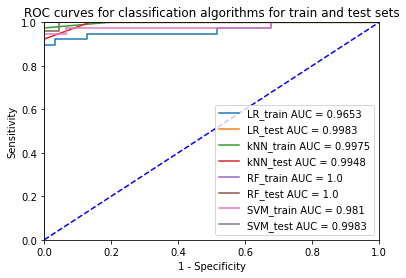

<Figure size 600x400 with 0 Axes>

In [22]:
random_seed = 45
    
for (model, gr_param, label) in zip(models, gr_params, labels):
    acc_tr = []
    se_tr = []
    sp_tr = []
    ppv_tr = []
    npv_tr = []
    roc_auc_tr = []
    acc_te = []
    se_te = []
    sp_te = []
    ppv_te = []
    npv_te = []
    roc_auc_te = []
    
    for i in range(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, stratify=y, random_state=42+i**2)
        
        # scaling
        scaler = StandardScaler(with_mean=True)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # training
        model_gs = GridSearchCV(model, gr_param,  cv=cv, scoring='balanced_accuracy').fit(X_train, y_train)
        print(model_gs.best_params_)
                
        # probabilities
        y_train_probs = np.array(model_gs.predict_proba(X_train)[:,1])
        y_test_probs = np.array(model_gs.predict_proba(X_test)[:,1])
        
        # predicted labels
        y_train_preds = np.where(y_train_probs > 0.5, 1, 0)
        #print(y_test_probs)
        y_test_preds = np.where(y_test_probs > 0.5, 1, 0)
        #y_train_preds = model_gs.predict(X_train)
        #y_test_preds = model_gs.predict(X_test)
        
        
        if i == 0:
            # train
            fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_probs)
            roc_auc = round(metrics.auc(fpr, tpr), 4)
            cm = confusion_matrix(y_train, y_train_preds, labels=[1,0])
            print(cm)
            
            plt.title('ROC кривые алгоритмов для обучающего и тестового набора данных')
            plt.plot(fpr, tpr, label = '{} AUC = {}'.format(label + '_train', roc_auc))
            plt.legend(loc = 'lower right')
            #plt.plot([0, 1], [0, 1],'b--', label='Случайный классификатор')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('Чувствительность')
            plt.xlabel('1 - Специфичность')
            
            # test
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_probs)
            roc_auc = round(metrics.auc(fpr, tpr), 4)
            cm = confusion_matrix(y_test, y_test_preds, labels=[1,0])
            print(cm)
            if label == 'kNN':
                print(y_test, 'test')
                print(y_test_probs, 'probs')
                
            
            plt.title('ROC curves for classification algorithms for train and test sets')
            plt.plot(fpr, tpr, label = '{} AUC = {}'.format(label + '_test', roc_auc))
            plt.legend(loc = 'lower right')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('Sensitivity')
            plt.xlabel('1 - Specificity')
        
        
        # score train
        fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_probs)
        roc_auc_tr.append(round(metrics.auc(fpr, tpr), 4))
        
        cm = confusion_matrix(y_train, y_train_preds, labels=[1,0])
        total = sum(sum(cm))
        
        acc_tr.append((cm[0,0] + cm[1,1]) / total)
        se_tr.append(cm[0,0] / (cm[0,0] + cm[0,1]))
        sp_tr.append(cm[1,1] / (cm[1,0] + cm[1,1]))
        ppv_tr.append(cm[0,0] / (cm[0,0] + cm[1,0]))
        npv_tr.append(cm[1,1] / (cm[0,1] + cm[1,1]))
        
        # score test
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_probs)
        roc_auc_te.append(round(metrics.auc(fpr, tpr), 4))
        
        cm = confusion_matrix(y_test, y_test_preds, labels=[1,0])
        total = sum(sum(cm))
        
        acc_te.append((cm[0,0] + cm[1,1]) / total)
        se_te.append(cm[0,0] / (cm[0,0] + cm[0,1]))
        sp_te.append(cm[1,1] / (cm[1,0] + cm[1,1]))
        ppv_te.append(cm[0,0] / (cm[0,0] + cm[1,0]))
        npv_te.append(cm[1,1] / (cm[0,1] + cm[1,1]))
    
    print(type(model).__name__)
    print('train')
    print('roc_auc: mean - {}, std - {}'.format(np.mean(roc_auc_tr), np.std(roc_auc_tr)))
    print('accuracy: mean - {}, std - {}'.format(np.mean(acc_tr), np.std(acc_tr)))
    print('sensitivity: mean - {}, std - {}'.format(np.mean(se_tr), np.std(se_tr)))
    print('specificity: mean - {}, std - {}'.format(np.mean(sp_tr), np.std(sp_tr)))
    print('ppv: mean - {}, std - {}'.format(np.mean(ppv_tr), np.std(ppv_tr)))
    print('npv: mean - {}, std - {}'.format(np.mean(npv_tr), np.std(npv_tr)))
    
    print('test')
    print('roc_auc: mean - {}, std - {}'.format(np.mean(roc_auc_te), np.std(roc_auc_te)))
    print('accuracy: mean - {}, std - {}'.format(np.mean(acc_te), np.std(acc_te)))
    print('sensitivity: mean - {}, std - {}'.format(np.mean(se_te), np.std(se_te)))
    print('specificity: mean - {}, std - {}'.format(np.mean(sp_te), np.std(sp_te)))
    print('ppv: mean - {}, std - {}'.format(np.mean(ppv_te), np.std(ppv_te)))
    print('npv: mean - {}, std - {}'.format(np.mean(npv_te), np.std(npv_te)))
    print()

plt.plot([0, 1], [0, 1],'b--', label='Random classifier')
plt.figure(dpi=100)
#plt.savefig('train_test_roc_curves')
plt.show()

# Feature importance

## Feature importance using logistic regression coefficients

In [23]:
p_lg = {'C':np.linspace(0.01,1,100), 'penalty':['l1']}
lg_grid = GridSearchCV(lg, p_lg, n_jobs=-1, cv=5, scoring='balanced_accuracy').fit(scaler.fit_transform(X), y)

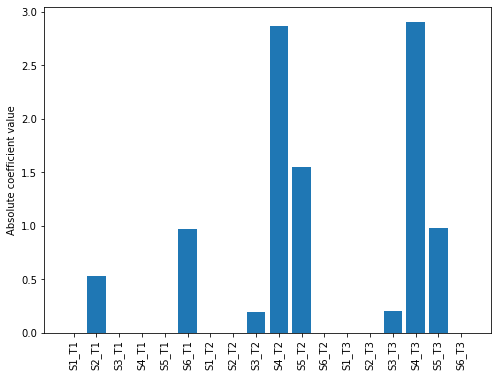

In [24]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

plt.bar(x=range(1,19), height=abs(lg_grid.best_estimator_.coef_[0]))
plt.xticks(range(1,19))
ax1.set_xticklabels(df.drop('Group', axis=1).columns, color='black', rotation=90);

plt.ylabel('Absolute coefficient value')
#plt.savefig('reg_feat_import.png')
plt.show()

## Feature importance using individual ROC curves

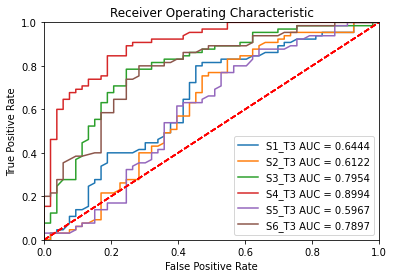

In [25]:
# individual ROC curves for importance representation

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# loading data
data = pd.read_csv('medical_study_data.csv', sep=';', engine='python')

# dataset preparation and scaling values from S*s to µS*s for comfortable opearation
df = data.drop(['Age', 'Sex', 'Smoking', 'LC_stage', 'LC_type', 'Group', 'Group_name', 'lscm'], axis=1).mul(10**6)
y = data.Group
df.insert(loc=18, column='Group', value=y)

X = df.drop('Group', axis=1)

# scaling
i = 0

for i in range(12,18):
    X_train = -X.iloc[:,i]
    y_train = y

    probs = X_train
    preds = probs
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
    roc_auc = round(metrics.auc(fpr, tpr), 4)

    # method I: plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label = '{} AUC = {}'.format(X.columns[i], roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('in-set, sensor T3 ROC')
plt.show()